In [1]:
"""
@author: pho

A fresh start using modern pipeline methods without all the excessive imports. Created by Pho on 2022-06-14

"""
# noinspection JupyterPackage
%load_ext autoreload
%autoreload 2
import sys
import importlib

from numba import jit
import numpy as np
import pandas as pd

# required to enable non-blocking interaction:
%gui qt5


from pyphocorehelpers.gui.PhoUIContainer import PhoUIContainer
import pyphoplacecellanalysis.External.pyqtgraph as pg
from pyphoplacecellanalysis.External.pyqtgraph.Qt import QtCore, QtGui, QtWidgets

# Pho's Formatting Preferences
from pyphocorehelpers.preferences_helpers import set_pho_preferences
set_pho_preferences()
np.set_printoptions(edgeitems=30, linewidth=100000, formatter=dict(float=lambda x: "%g" % x))

%config Completer.use_jedi = False

In [2]:
# from pyphoplacecellanalysis.GUI.Qt
# from pyqtplot_MainWindow import PhoPipelineMainWindow
# from pyphoplacecellanalysis.GUI.Qt.MainApplicationWindows.PhoMainPipelineWindow.pyqtplot_MainWindow import PhoPipelineMainWindow

from pyphoplacecellanalysis.External.pyqtgraph.flowchart import Flowchart, Node
import pyphoplacecellanalysis.External.pyqtgraph.flowchart.library as fclib
from pyphoplacecellanalysis.GUI.PyQtPlot.Flowchart.ReloadableNodeLibrary import ReloadableNodeLibrary

from pyphoplacecellanalysis.GUI.Qt.MainApplicationWindows.PhoPipelineMainWindow.pyqtplot_MainWindow import PhoPipelineMainWindow

# GUI.Qt.MainApplicationWindows.PhoPipelineMainWindow.pyqtplot_MainWindow

# PhoMainPipelineWindow.pyqtplot_MainWindow import PhoPipelineMainWindow


In [3]:
# from pyphoplacecellanalysis.GUI.PyQtPlot.Flowchart.pyqtplot_Flowchart import plot_flowchartWidget
# pipeline_flowchart_window, pipeline_flowchart_app = plot_flowchartWidget(title='PhoMainPipelineFlowchartApp')
# Add the flowchart widget. This is actually not the programmatic programming environment itself, it's the column that lists the nodes and lets you set their parameters.
# flowchart_controls_widget = mainAppWindow.flowchart.widget()

In [4]:

## Create an empty flowchart with a single input and output
flowchart = Flowchart(terminals={
    'dataIn': {'io': 'in'},
    'dataOut': {'io': 'out'}    
})


# # Add the flowchart widget. This is actually not the programmatic programming environment itself, it's the column that lists the nodes and lets you set their parameters.
# flowchart_controls_widget = flowchart.widget()
pipeline_start_x = 0
flowchart.setInput(dataIn=None)

# Setup the nodes in the flowchart:
ReloadableNodeLibrary.setup_custom_node_library(flowchart)

# Create the nodes:
pipeline_input_node = flowchart.createNode('PipelineInputDataNode', pos=(pipeline_start_x-400, 50))

pipeline_filter_node = flowchart.createNode('PipelineFilteringDataNode', pos=(pipeline_start_x-26, 50))

pipeline_computation_node = flowchart.createNode('PipelineComputationsNode', pos=(pipeline_start_x+154, 50))

# pipeline_display_node = flowchart.createNode('PipelineDisplayNode', pos=(pipeline_start_x+280, 120))

# # Pipeline Result Visualization Node:
# pipeline_result_viz_node = flowchart.createNode('PipelineResultVisNode', pos=(pipeline_start_x+280, 220))
# pipeline_result_viz_node.on_add_function = on_add_function
# pipeline_result_viz_node.on_remove_function = on_remove_function
flowchart

num_known_types: 2
ctrl_node_ops: [('data_mode', 'combo', {'values': ['bapun', 'kdiba', 'custom...'], 'index': 0})]
 custom_ops:[('reload', 'action')]
 self.uiTemplate: [('data_mode', 'combo', {'values': ['bapun', 'kdiba', 'custom...'], 'index': 0})]

ctrl_node_ops: []
 custom_ops:[('included_configs_table', 'extendedchecktable', {'columns': ['filter'], 'rows': ['test1', 'test2']}), ('refilter', 'action')]
 self.uiTemplate: []

ctrl_node_ops: []
 custom_ops:[('recompute', 'action'), ('included_configs_table', 'extendedchecktable', {'columns': ['compute'], 'rows': ['test1', 'test2']})]
 self.uiTemplate: []



<Node Flowchart @1b480f949d0>

#### Note: can do programmatic updates on the nodes via:
```python
## get the Node's control widget and place it inside the main window
filterCtrl = filterNode.ctrlWidget()
someLayout.addWidget(filterCtrl)

## later on, process data through the node
filteredData = filterNode.process(inputTerminal=rawData)

```

In [6]:
## Wire them up:

# Setup connections:
flowchart.connectTerminals(flowchart['dataIn'], pipeline_input_node['known_mode'])

# Input Node Outputs:
flowchart.connectTerminals(pipeline_input_node['loaded_pipeline'], pipeline_filter_node['pipeline'])
flowchart.connectTerminals(pipeline_input_node['known_data_mode'], pipeline_filter_node['active_data_mode'])

# flowchart.connectTerminals(pipeline_input_node['known_data_mode'], pipeline_display_node['mode'])

# Filter Node Outputs:
flowchart.connectTerminals(pipeline_filter_node['filtered_pipeline'], pipeline_computation_node['pipeline'])
flowchart.connectTerminals(pipeline_filter_node['computation_configs'], pipeline_computation_node['computation_configs'])
# flowchart.connectTerminals(pipeline_filter_node['filter_configs'], pipeline_display_node['filter_configs'])

# Computation Node Outputs:
# flowchart.connectTerminals(pipeline_computation_node['computed_pipeline'], pipeline_display_node['pipeline'])
# flowchart.connectTerminals(pipeline_computation_node['updated_computation_configs'], pipeline_display_node['computation_configs'])

# flowchart.connectTerminals(pipeline_computation_node['computed_pipeline'], pipeline_result_viz_node['pipeline'])
# flowchart.connectTerminals(pipeline_computation_node['updated_computation_configs'], pipeline_result_viz_node['computation_configs'])

flowchart.connectTerminals(pipeline_computation_node['computed_pipeline'], flowchart['dataOut']) # raw pipeline output from computation node


## Build Controls to set node parameters:
inputCtrl = pipeline_input_node.ctrlWidget()
filterCtrl = pipeline_filter_node.ctrlWidget()
computationCtrl = pipeline_computation_node.ctrlWidget()

# Add the controls to a layout:
layout_widget = pg.LayoutWidget()
layout_widget.setWindowTitle('Manu Flowchar Widget Display')

# (inputCtrl, filterCtrl, computationCtrl)
layout_widget.addWidget(inputCtrl, row=0, col=0)
layout_widget.addWidget(filterCtrl, row=1, col=0)
layout_widget.addWidget(computationCtrl, row=2, col=0)
layout_widget.show()
layout_widget.resize(800,900)

PipelineInputDataNode data_mode from dropdown list: kdiba
basedir is already Path object.
	 basepath: R:\data\KDIBA\gor01\one\2006-6-07_11-26-53
	 session_name: 2006-6-07_11-26-53
Loading matlab import file results to R:\data\KDIBA\gor01\one\2006-6-07_11-26-53\2006-6-07_11-26-53.epochs_info.mat... done.
Loading matlab import file results to R:\data\KDIBA\gor01\one\2006-6-07_11-26-53\2006-6-07_11-26-53.position_info.mat... done.
Loading matlab import file results to R:\data\KDIBA\gor01\one\2006-6-07_11-26-53\2006-6-07_11-26-53.spikes.mat... done.
Failure loading .position.npy. Must recompute.

Computing linear positions for all active epochs for session... Saving updated position results results to R:\data\KDIBA\gor01\one\2006-6-07_11-26-53\2006-6-07_11-26-53.position.npy... 2006-6-07_11-26-53.position.npy saved
done.
	 Failure loading .interpolated_spike_positions.npy. Must recompute.

	 Saving updated interpolated spike position results results to R:\data\KDIBA\gor01\one\2006-6-07_11-

c:\users\pho\repos\neuropy\neuropy\core\laps.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps_df[['lap_id']] = laps_df[['lap_id']].astype('int')
c:\users\pho\repos\neuropy\neuropy\core\laps.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps_df[['start_spike_index', 'end_spike_index']] = laps_df[['start_spike_index', 'end_spike_index']].astype('int')
c:\users\pho\repos\neuropy\neuropy\core\laps.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [ ]:
## Where is the result from .process(...) going?

## later on, process data through the node
# filteredData = filterNode.process(inputTerminal=rawData)

In [ ]:
flowchart_controls_widget = flowchart.widget() # FlowchartCtrlWidget
flowchart_window = flowchart_controls_widget.cwWin

pipeline_flowchart_nodes = pipeline_flowchart.nodes()

### Try to extract the results into the Jupyter-lab notebook from the Flowchart nodes:

In [10]:
# Note this works, meaning I can get the values just like I do in the regular Jupyter-Lab notebook
curr_active_pipeline = pipeline_computation_node.outputs()['computed_pipeline'].value()
curr_active_pipeline # NeuropyPipeline

In [ ]:
display_outputs = curr_node.outputs()['display_outputs'].value()

In [ ]:
fileSelectWidget = pg.FileDialog()
layout_widget.addWidget(inputCtrl, row=3, col=0)

In [ ]:
layout_widget = None

# Custom Export Widget Testing

In [ ]:
# List available properties from the dictionary:
enable_debug_print = True


curr_epoch_labels = list(curr_active_pipeline.sess.epochs.labels) # ['pre', 'maze1', 'post1', 'maze2', 'post2']
if enable_debug_print:
    print(f'curr_epoch_labels: {curr_epoch_labels}')
    
curr_named_timeranges = [curr_active_pipeline.sess.epochs.get_named_timerange(a_label) for a_label in curr_epoch_labels]
if enable_debug_print:
    print(f'curr_named_timeranges: {curr_named_timeranges}')

# Filters list:
all_filters_list = list(curr_active_pipeline.filtered_sessions.keys())
if enable_debug_print:
    print(f'all_filters_list: {all_filters_list}')

    
all_computed_timeranges_list = _get_valid_computation_results_config_names(curr_active_pipeline)
if enable_debug_print:
    print(f'all_computed_timeranges_list: {all_computed_timeranges_list}')
    
"""
    curr_epoch_labels: ['maze1', 'maze2']
    curr_named_timeranges: [<NamedTimerange: {'name': 'maze1', 'start_end_times': array([22.26, 1739.15])};>, <NamedTimerange: {'name': 'maze2', 'start_end_times': array([1739.15, 1932.42])};>]
    all_filters_list: ['maze1']
    computed_config_names_list: ['maze1']
    all_computed_timeranges_list: ['maze1']
"""

# active_config_name = 'maze1'

## Path selection via Custom Save Widget Testing

In [ ]:
from pyphocorehelpers.gui.Qt.InlineFilesystemPathSelectWidget.InlineFilesystemPathSelectWidget import InlineFilesystemPathSelectWidget

# Build a CtrlWidget for exporting the results out to file:
export_ui = PhoUIContainer('ExportNode')
export_ui.layout_widget = pg.LayoutWidget()
export_ui.layout_widget.setWindowTitle('ExportNode CtrlWidget')

# Build the export path selection widget
export_ui.path_data_root_select_widget = InlineFilesystemPathSelectWidget('Export')
export_ui.layout_widget.addWidget(export_ui.path_data_root_select_widget, colspan=2)
export_ui.layout_widget.nextRow()
export_ui.btnExport = pg.FeedbackButton('Export')
export_ui.layout_widget.addWidget(export_ui.btnExport, colspan=1, col=1)

export_ui.layout_widget.show()
# export_ui.root_widget.setLayout(export_ui.layout_widget)
# export_ui.root_widget.show()
# export_ui.path_data_root_select_widget.show()

## pg.ParameterList version:

In [11]:
# import pyphoplacecellanalysis.External.pyqtgraph.parametertree.parameterTypes as pTypes
# from pyphoplacecellanalysis.External.pyqtgraph.parametertree import Parameter, ParameterTree
from pyphoplacecellanalysis.GUI.PyQtPlot.Params.ParameterTrees.ExportPipelineParametersTree import build_export_parameters_tree

p = build_export_parameters_tree(curr_active_pipeline, parameter_names='ExportParams', finalized_output_cache_file='data/pipeline_cache_store.h5', include_state_save_restore_buttons=False, debug_print=True)

key_children_list: [{'name': '/filtered_sessions/maze1/spikes_df', 'type': 'str', 'value': 'spikes_df'}, {'name': '/filtered_sessions/maze1/pos_df', 'type': 'str', 'value': 'positions_df'}]


In [12]:
from pyphoplacecellanalysis.External.pyqtgraph.parametertree import Parameter, ParameterTree
## Create ParameterTree widget
t = ParameterTree()
t.setParameters(p, showTop=False)
t.setWindowTitle('Export Parameters Tree Example')
t.resize(700, 1000)
t.show()

NameError: name 'ParameterTree' is not defined

In [ ]:
export_keys_list = p.param("Export Keys")
export_keys_list # ExportHdf5KeysGroup 

In [ ]:
export_keys_list.clearChildren()
# export_keys_list.addChildren(children=)

In [ ]:
# export_keys_list.children = 

In [ ]:
p["Export Keys"]

In [ ]:
## test save/restore
state = p.saveState()
p.restoreState(state)
compareState = p.saveState()
print(f'state: {state}')
assert pg.eq(compareState, state)

In [ ]:
# direct from widget (WORKS):
curr_export_path_str = p['Export Path']

# from saved state:
# curr_export_path_str = state['children']['Export Path']['value']

print(f'curr_export_path_str: {curr_export_path_str}')

In [ ]:
from pyphocorehelpers.print_helpers import print_keys_if_possible, print_value_overview_only

print_keys_if_possible('state', state)

# Reference

## Widget Reference

### Qt QFormLayout example

In [ ]:
win = QtWidgets.QWidget()

l1 = QtWidgets.QLabel("Name")
nm = QtWidgets.QLineEdit()

l2 = QtWidgets.QLabel("Address")
add1 = QtWidgets.QLineEdit()
add2 = QtWidgets.QLineEdit()
fbox = QtWidgets.QFormLayout()
fbox.addRow(l1,nm)
vbox = QtWidgets.QVBoxLayout()

vbox.addWidget(add1)
vbox.addWidget(add2)
fbox.addRow(l2,vbox)
hbox = QtWidgets.QHBoxLayout()

r1 = QtWidgets.QRadioButton("Male")
r2 = QtWidgets.QRadioButton("Female")
hbox.addWidget(r1)
hbox.addWidget(r2)
hbox.addStretch()
fbox.addRow(QtWidgets.QLabel("sex"), hbox)
fbox.addRow(QtWidgets.QPushButton("Submit"), QtWidgets.QPushButton("Cancel"))

win.setLayout(fbox)

win.setWindowTitle("PyQt")
win.show()

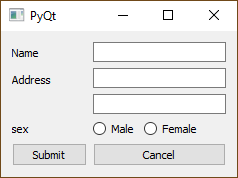